<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-information-from-GFF-file" data-toc-modified-id="Get-information-from-GFF-file-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get information from GFF file</a></span><ul class="toc-item"><li><span><a href="#Convert-GFF-to-Pandas-DataFrame" data-toc-modified-id="Convert-GFF-to-Pandas-DataFrame-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Convert GFF to Pandas DataFrame</a></span></li></ul></li><li><span><a href="#KEGG-and-COGs" data-toc-modified-id="KEGG-and-COGs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>KEGG and COGs</a></span><ul class="toc-item"><li><span><a href="#Generate-nucleotide-fasta-files-for-CDS" data-toc-modified-id="Generate-nucleotide-fasta-files-for-CDS-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generate nucleotide fasta files for CDS</a></span></li><li><span><a href="#Run-EggNOG-Mapper" data-toc-modified-id="Run-EggNOG-Mapper-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Run EggNOG Mapper</a></span></li><li><span><a href="#Get-KEGG-attributes" data-toc-modified-id="Get-KEGG-attributes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Get KEGG attributes</a></span></li><li><span><a href="#Save-KEGG-information" data-toc-modified-id="Save-KEGG-information-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Save KEGG information</a></span></li><li><span><a href="#Save-COGs-to-annotation-dataframe" data-toc-modified-id="Save-COGs-to-annotation-dataframe-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Save COGs to annotation dataframe</a></span></li></ul></li><li><span><a href="#Uniprot-ID-mapping" data-toc-modified-id="Uniprot-ID-mapping-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Uniprot ID mapping</a></span></li><li><span><a href="#Clean-up-and-save-annotation" data-toc-modified-id="Clean-up-and-save-annotation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clean up and save annotation</a></span><ul class="toc-item"><li><span><a href="#Final-statistics" data-toc-modified-id="Final-statistics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Final statistics</a></span></li><li><span><a href="#Fill-missing-values" data-toc-modified-id="Fill-missing-values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fill missing values</a></span></li></ul></li><li><span><a href="#GO-Annotations" data-toc-modified-id="GO-Annotations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>GO Annotations</a></span></li></ul></div>

In [164]:
import os
import sys
from Bio import SeqIO
sys.path.append('/home/tahani/Documents/github/pymodulon/')
from pymodulon.gene_util import *

In [165]:
org_dir = '/home/tahani/Documents/github/modulome_selon/data'
kegg_organism_code = 'syf'
seq_dir = os.path.join(org_dir,'sequence_files')

# Get information from GFF file

## Convert GFF to Pandas DataFrame

In [166]:
annot_list = []
for filename in os.listdir(seq_dir):
    if filename.endswith('.gff3'):
        gff = os.path.join(seq_dir,filename)
        annot_list.append(gff2pandas(gff))
keep_cols = ['refseq','start','end','strand','gene_name','locus_tag','old_locus_tag','gene_product','ncbi_protein']
DF_annot = pd.concat(annot_list)[keep_cols]
DF_annot = DF_annot.drop_duplicates('locus_tag')
DF_annot.set_index('locus_tag',drop=True,inplace=True)

In [167]:
tpm_file = os.path.join(org_dir,'1_log_tpm_qc_2.csv')
DF_log_tpm = pd.read_csv(tpm_file,index_col=0)
DF_log_tpm.head()

,SRX2356912,SRX2356914,SRX2356915,SRX2356921,SRX2356922,SRX2356923,SRX2356924,SRX2356925,SRX2356926,SRX2356927,...,SRX4105555,SRX4105556,SRX4105557,SRX4105558,SRX4105559,SRX4105561,SRX4105564,SRX4105565,SRX4105566,SRX4105568
Geneid,,,,,,,,,,,,,,,,,,,,,
HKK26_RS00005,2.268269,1.552809,1.159188,0.913488,2.695208,2.966228,2.650156,2.935060,3.211968,2.458104,...,2.002141,1.791584,2.403361,3.204948,4.068362,4.031640,2.786047,3.563685,3.928890,4.304850
HKK26_RS00010,4.340258,3.774119,4.407238,5.608838,5.757190,5.464241,3.562456,4.014593,5.052405,5.434546,...,2.427671,2.898705,1.523843,1.204301,1.139423,3.439600,3.059046,0.641880,3.193223,3.733863
HKK26_RS00015,5.930896,8.026868,9.210999,6.071882,5.803957,5.074470,4.795413,4.311091,5.573173,8.094353,...,4.943405,4.553277,4.634317,5.165084,5.487604,6.200950,5.286107,5.601627,5.688674,5.843731
HKK26_RS00020,5.009002,5.071857,4.933016,4.906550,5.389729,5.292301,4.832192,4.383454,3.047043,3.613219,...,1.626420,1.344100,3.787792,3.747515,4.185717,4.057178,3.964984,4.448220,4.559986,4.491927
HKK26_RS00025,0.000000,0.000000,0.000000,3.272424,3.369822,0.000000,0.000000,0.000000,1.820697,0.000000,...,1.670371,3.952524,0.952121,2.906885,0.000000,0.000000,4.387985,4.104117,2.934243,2.834355


Check that the genes are the same in the expression dataset as in the annotation dataframe.

In [168]:
# Mismatched genes are listed below
test = DF_annot.sort_index().index == DF_log_tpm.sort_index().index
DF_annot[~test]

,refseq,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein
locus_tag,,,,,,,,


# KEGG and COGs

## Generate nucleotide fasta files for CDS

In [169]:
cds_list = []
for filename in os.listdir(seq_dir):
    if filename.endswith('.fasta'):
        fasta = os.path.join(seq_dir,filename)
        seq = SeqIO.read(fasta,'fasta')
        
        # Get gene information for genes in this fasta file
        df_genes = DF_annot[DF_annot.refseq == seq.id]
        for i,row in df_genes.iterrows():
            cds = seq[row.start-1:row.end]
            if row.strand == '-':
                cds = seq[row.start-1:row.end].reverse_complement()
            cds.id = row.name
            cds.description = row.gene_name if pd.notnull(row.gene_name) else row.name
            cds_list.append(cds)

In [170]:
SeqIO.write(cds_list,os.path.join(seq_dir,'CDS.fna'),'fasta')

2700

## Run EggNOG Mapper
1. Go to http://eggnog-mapper.embl.de/.
1. Upload the CDS.fna file from your organism directory (within the sequence_files folder)
1. Make sure to limit the taxonomy to the correct level
1. After the job is submitted, you must follow the link in your email to run the job.
1. Once the job completes (after ~4 hrs), download the annotations file.
1. Save the annotation file to `<org_dir>/data/eggNOG.annotations`

## Get KEGG attributes

In [171]:
DF_eggnog = pd.read_csv(os.path.join(org_dir,'Synechococcus_elongatus.annotations')
                        ,sep='\t',skiprows=4,header=None)

eggnog_cols = ['query_name','seed eggNOG ortholog','seed ortholog evalue','seed ortholog score',
               'Predicted taxonomic group','Predicted protein name','Gene Ontology terms',
               'EC number','KEGG_orth','KEGG_pathway','KEGG_module','KEGG_reaction',
               'KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG Reaction','tax_scope',
               'eggNOG OGs','bestOG_deprecated','COG','eggNOG free text description']

DF_eggnog.columns = eggnog_cols

# Strip last three rows as they are comments
DF_eggnog = DF_eggnog.iloc[:-3]

# Set locus tag as index
DF_eggnog = DF_eggnog.set_index('query_name')
DF_eggnog.index.name = 'locus_tag'

In [172]:
DF_kegg = DF_eggnog[['KEGG_orth','KEGG_pathway','KEGG_module','KEGG_reaction']]

# Melt dataframe
DF_kegg = DF_kegg.reset_index().melt(id_vars='locus_tag') 

# Remove null values
DF_kegg = DF_kegg[DF_kegg.value.notnull()]

# Split comma-separated values into their own rows
list2struct = []
for name,row in DF_kegg.iterrows():
    for val in row.value.split(','):
        list2struct.append([row.locus_tag,row.variable,val])

DF_kegg = pd.DataFrame(list2struct,columns=['gene_id','database','kegg_id'])

# Remove ko entries, as only map entries are searchable in KEGG pathway
DF_kegg = DF_kegg[~DF_kegg.kegg_id.str.startswith('ko')]

DF_kegg.head()

,gene_id,database,kegg_id
1440,SYNPCC7942_RS00005,KEGG_pathway,map00230
1441,SYNPCC7942_RS00005,KEGG_pathway,map00240
1442,SYNPCC7942_RS00005,KEGG_pathway,map01100
1443,SYNPCC7942_RS00005,KEGG_pathway,map03030
1444,SYNPCC7942_RS00005,KEGG_pathway,map03430


## Save KEGG information

In [173]:
DF_kegg.to_csv(os.path.join(org_dir,'2_kegg_mapping.csv'))

## Save COGs to annotation dataframe

In [174]:
DF_annot['COG'] = DF_eggnog.COG

# Make sure COG only has one entry per gene
DF_annot['COG'] = [item[0] if isinstance(item,str) else item for item in DF_annot['COG']]

# Uniprot ID mapping

In [175]:
# Try the uniprot ID mapping tool - Use EMBL for Genbank file and P_REFSEQ_AC for Refseq file
mapping_uniprot = uniprot_id_mapping(DF_annot.ncbi_protein.fillna(''),input_id='P_REFSEQ_AC',output_id='ACC',
                             input_name='ncbi_protein',output_name='uniprot')

# Merge with current annotation
DF_annot = pd.merge(DF_annot.reset_index(),mapping_uniprot,how='left',on='ncbi_protein')
DF_annot.set_index('locus_tag',inplace=True)
assert(len(DF_annot) == len(DF_annot))

In [176]:
DF_annot.head()

,refseq,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein,COG,uniprot
locus_tag,,,,,,,,,,
SYNPCC7942_RS00005,NC_007604.1,65,1237,+,None,Synpcc7942_0001,DNA polymerase III subunit beta,WP_011243806.1,L,UPI000049B79B
SYNPCC7942_RS00010,NC_007604.1,1262,2134,+,None,Synpcc7942_0002,hypothetical protein,WP_011243805.1,S,A0A0H3K3Q0
SYNPCC7942_RS00015,NC_007604.1,2178,4511,+,purL,Synpcc7942_0003,phosphoribosylformylglycinamidine synthase sub...,WP_011243804.1,F,Q55041
SYNPCC7942_RS00020,NC_007604.1,4596,6077,+,None,Synpcc7942_0004,amidophosphoribosyltransferase,WP_011243803.1,F,A0A0H3K6A8
SYNPCC7942_RS00025,NC_007604.1,6111,7706,-,None,Synpcc7942_0005,permease,WP_011377397.1,P,Q31SD2


# Clean up and save annotation

In [177]:
# Temporarily remove warning
pd.set_option('mode.chained_assignment', None)

In [178]:
# Reorder annotation file
if 'old_locus_tag' in DF_annot.columns:
    order = ['gene_name','old_locus_tag','start','end','strand','gene_product','COG','uniprot']
else:
    order = ['gene_name','start','end','strand','gene_product','COG','uniprot']
    
DF_annot = DF_annot[order]

In [179]:
DF_annot.head()

,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot
locus_tag,,,,,,,,
SYNPCC7942_RS00005,None,Synpcc7942_0001,65,1237,+,DNA polymerase III subunit beta,L,UPI000049B79B
SYNPCC7942_RS00010,None,Synpcc7942_0002,1262,2134,+,hypothetical protein,S,A0A0H3K3Q0
SYNPCC7942_RS00015,purL,Synpcc7942_0003,2178,4511,+,phosphoribosylformylglycinamidine synthase sub...,F,Q55041
SYNPCC7942_RS00020,None,Synpcc7942_0004,4596,6077,+,amidophosphoribosyltransferase,F,A0A0H3K6A8
SYNPCC7942_RS00025,None,Synpcc7942_0005,6111,7706,-,permease,P,Q31SD2


## Final statistics

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
sns.set_style('ticks')

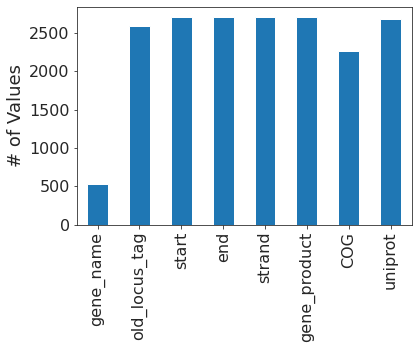

In [182]:
fig,ax = plt.subplots()
DF_annot.count().plot(kind='bar',ax=ax)
ax.set_ylabel('# of Values',fontsize=18)
ax.tick_params(labelsize=16)

## Fill missing values

In [183]:
# Fill in missing gene names with locus tag names
DF_annot['tmp_name'] = DF_annot.copy().index.tolist()
DF_annot.gene_name.fillna(DF_annot.tmp_name,inplace=True)
DF_annot.drop('tmp_name',axis=1,inplace=True)

# Fill missing COGs with X
DF_annot['COG'].fillna('X',inplace=True)

# Change single letter COG annotation to full description
DF_annot['COG'] = DF_annot.COG.apply(cog2str)

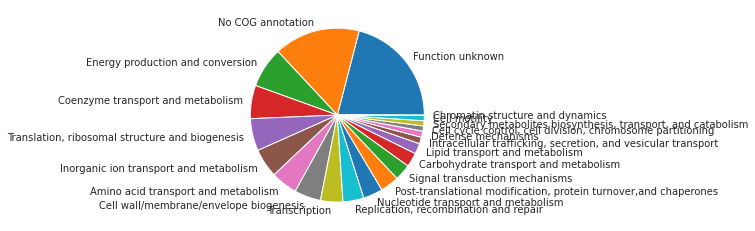

In [184]:
counts = DF_annot.COG.value_counts()
plt.pie(counts.values,labels=counts.index);

# Adding BioCycle Annotation

In [185]:
Biocyc = os.path.join(org_dir,'BioCyc_reference.csv')
DF_Biocyc = pd.read_csv(Biocyc,error_bad_lines=False,sep='\t',index_col=0)
DF_Biocyc.head()

,gene_product,new_locus,gene_name_2
gene_name,,,
SYNPCC7942_1341,conserved hypothetical protein,SYNPCC7942_RS06855,SYNPCC7942_1341
nblC,anti-sigma regulatory factor NblC,SYNPCC7942_RS07355,nblC
SYNPCC7942_2366,hypothetical protein,SYNPCC7942_RS12020,SYNPCC7942_2366
SYNPCC7942_2026,probable glycosyltransferase,SYNPCC7942_RS10280,SYNPCC7942_2026
SYNPCC7942_0096,conserved hypothetical protein,SYNPCC7942_RS00490,SYNPCC7942_0096


In [186]:
# Adding biocycle gene names:
dict_biocyc_gene_name = dict(zip(DF_Biocyc.new_locus, DF_Biocyc.gene_name_2))
DF_annot['biocyc_gene'] = DF_annot.index # new locus
DF_annot.replace({'biocyc_gene':dict_biocyc_gene_name},inplace=True)
DF_annot

,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,biocyc_gene
locus_tag,,,,,,,,,
SYNPCC7942_RS00005,SYNPCC7942_RS00005,Synpcc7942_0001,65,1237,+,DNA polymerase III subunit beta,"Replication, recombination and repair",UPI000049B79B,dnaN
SYNPCC7942_RS00010,SYNPCC7942_RS00010,Synpcc7942_0002,1262,2134,+,hypothetical protein,Function unknown,A0A0H3K3Q0,SYNPCC7942_0002
SYNPCC7942_RS00015,purL,Synpcc7942_0003,2178,4511,+,phosphoribosylformylglycinamidine synthase sub...,Nucleotide transport and metabolism,Q55041,purL
SYNPCC7942_RS00020,SYNPCC7942_RS00020,Synpcc7942_0004,4596,6077,+,amidophosphoribosyltransferase,Nucleotide transport and metabolism,A0A0H3K6A8,purF
SYNPCC7942_RS00025,SYNPCC7942_RS00025,Synpcc7942_0005,6111,7706,-,permease,Inorganic ion transport and metabolism,Q31SD2,SYNPCC7942_0005
...,...,...,...,...,...,...,...,...,...
ST32046_p9,ST32046_p9,pUH24_09,574,1137,-,hypothetical protein,No COG annotation,Q53571,ST32046_p9
ST32046_p4,pmaA,pUH24_04,1485,1928,+,hypothetical protein,No COG annotation,Q53572,ST32046_p4
ST32046_p5,pmaB,pUH24_05,1938,2483,+,hypothetical protein,No COG annotation,Q53573,ST32046_p5


In [187]:
# Adding biocycle gene names:
dict_biocyc_gene_product = dict(zip(DF_Biocyc.new_locus, DF_Biocyc.gene_product))
DF_annot['biocyc_product'] = DF_annot.index # new locus
DF_annot.replace({'biocyc_product':dict_biocyc_gene_product},inplace=True)
DF_annot.head()

,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,biocyc_gene,biocyc_product
locus_tag,,,,,,,,,,
SYNPCC7942_RS00005,SYNPCC7942_RS00005,Synpcc7942_0001,65,1237,+,DNA polymerase III subunit beta,"Replication, recombination and repair",UPI000049B79B,dnaN,"DNA polymerase III, &beta; subunit"
SYNPCC7942_RS00010,SYNPCC7942_RS00010,Synpcc7942_0002,1262,2134,+,hypothetical protein,Function unknown,A0A0H3K3Q0,SYNPCC7942_0002,hypothetical protein
SYNPCC7942_RS00015,purL,Synpcc7942_0003,2178,4511,+,phosphoribosylformylglycinamidine synthase sub...,Nucleotide transport and metabolism,Q55041,purL,phosphoribosylformylglycinamidine synthase II
SYNPCC7942_RS00020,SYNPCC7942_RS00020,Synpcc7942_0004,4596,6077,+,amidophosphoribosyltransferase,Nucleotide transport and metabolism,A0A0H3K6A8,purF,amidophosphoribosyltransferase
SYNPCC7942_RS00025,SYNPCC7942_RS00025,Synpcc7942_0005,6111,7706,-,permease,Inorganic ion transport and metabolism,Q31SD2,SYNPCC7942_0005,conserved hypothetical protein


In [188]:
cog_dict = {
        'A': 'RNA processing and modification',
        'B': 'Chromatin structure and dynamics',
        'C': 'Energy production and conversion',
        'D': 'Cell cycle control, cell division, chromosome partitioning',
        'E': 'Amino acid transport and metabolism',
        'F': 'Nucleotide transport and metabolism',
        'G': 'Carbohydrate transport and metabolism',
        'H': 'Coenzyme transport and metabolism',
        'I': 'Lipid transport and metabolism',
        'J': 'Translation, ribosomal structure and biogenesis',
        'K': 'Transcription',
        'L': 'Replication, recombination and repair',
        'M': 'Cell wall/membrane/envelope biogenesis',
        'N': 'Cell motility',
        'O': 'Post-translational modification, protein turnover,'
             'and chaperones',
        'P': 'Inorganic ion transport and metabolism',
        'Q': 'Secondary metabolites biosynthesis, transport, and catabolism',
        'R': 'General function prediction only',
        'S': 'Function unknown',
        'T': 'Signal transduction mechanisms',
        'U': 'Intracellular trafficking, secretion, and vesicular transport',
        'V': 'Defense mechanisms',
        'W': 'Extracellular structures',
        'X': 'No COG annotation',
        'Y': 'Nuclear structure',
        'Z': 'Cytoskeleton'
    }
DF_annot.replace({'COG':cog_dict},inplace=True)
DF_annot.head()

,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,biocyc_gene,biocyc_product
locus_tag,,,,,,,,,,
SYNPCC7942_RS00005,SYNPCC7942_RS00005,Synpcc7942_0001,65,1237,+,DNA polymerase III subunit beta,"Replication, recombination and repair",UPI000049B79B,dnaN,"DNA polymerase III, &beta; subunit"
SYNPCC7942_RS00010,SYNPCC7942_RS00010,Synpcc7942_0002,1262,2134,+,hypothetical protein,Function unknown,A0A0H3K3Q0,SYNPCC7942_0002,hypothetical protein
SYNPCC7942_RS00015,purL,Synpcc7942_0003,2178,4511,+,phosphoribosylformylglycinamidine synthase sub...,Nucleotide transport and metabolism,Q55041,purL,phosphoribosylformylglycinamidine synthase II
SYNPCC7942_RS00020,SYNPCC7942_RS00020,Synpcc7942_0004,4596,6077,+,amidophosphoribosyltransferase,Nucleotide transport and metabolism,A0A0H3K6A8,purF,amidophosphoribosyltransferase
SYNPCC7942_RS00025,SYNPCC7942_RS00025,Synpcc7942_0005,6111,7706,-,permease,Inorganic ion transport and metabolism,Q31SD2,SYNPCC7942_0005,conserved hypothetical protein


# Reordering the columns 

In [189]:
DF_annot_final = DF_annot.reindex(columns=['old_locus_tag', 'biocyc_gene',
 'biocyc_product', 'gene_product', 'gene_name',
 'COG',
 'uniprot'])
DF_annot_final.head()

,old_locus_tag,biocyc_gene,biocyc_product,gene_product,gene_name,COG,uniprot
locus_tag,,,,,,,
SYNPCC7942_RS00005,Synpcc7942_0001,dnaN,"DNA polymerase III, &beta; subunit",DNA polymerase III subunit beta,SYNPCC7942_RS00005,"Replication, recombination and repair",UPI000049B79B
SYNPCC7942_RS00010,Synpcc7942_0002,SYNPCC7942_0002,hypothetical protein,hypothetical protein,SYNPCC7942_RS00010,Function unknown,A0A0H3K3Q0
SYNPCC7942_RS00015,Synpcc7942_0003,purL,phosphoribosylformylglycinamidine synthase II,phosphoribosylformylglycinamidine synthase sub...,purL,Nucleotide transport and metabolism,Q55041
SYNPCC7942_RS00020,Synpcc7942_0004,purF,amidophosphoribosyltransferase,amidophosphoribosyltransferase,SYNPCC7942_RS00020,Nucleotide transport and metabolism,A0A0H3K6A8
SYNPCC7942_RS00025,Synpcc7942_0005,SYNPCC7942_0005,conserved hypothetical protein,permease,SYNPCC7942_RS00025,Inorganic ion transport and metabolism,Q31SD2


In [190]:
DF_annot.to_csv(os.path.join(org_dir,'gene_info_final.csv'))

# GO Annotations

To start, download the GO Annotations for your organism from AmiGO 2
1. Go to http://amigo.geneontology.org/amigo/search/annotation
1. Filter for your organism
1. Click `CustomDL`
1. Drag `GO class (direct)` to the end of your Selected Fields
1. Save as `GO_annotations.txt` in the `data` folder of your organism directory

In [207]:
org_dir

'/home/tahani/Documents/github/modulome_selon/data'

In [208]:
DF_GO = pd.read_csv(os.path.join(org_dir,'go_annotation.txt'),sep='\t',header=None,usecols=[2,10,17])
DF_GO.columns = ['gene_name','gene_id','gene_ontology']
DF_GO.gene_id.fillna(DF_GO.gene_name,inplace=True)
DF_GO = DF_GO[['gene_id','gene_ontology']]
DF_GO.head()

,gene_id,gene_ontology
0,Synpcc7942_2462,GO:0005524
1,Synpcc7942_2462,GO:0019150
2,rbcL|Synpcc7942_1426,GO:0031470
3,Q31QW7,GO:0031470
4,Q31QW7,GO:0043886


Take a look at the `gene_id` column:
1. Make sure there are no null entries
2. Check if it uses the new or old locus tag (if applicable)

In [209]:
DF_GO[DF_GO.gene_id.isnull()]

,gene_id,gene_ontology


In [204]:
# Uncomment this code to replace old locus tag with new locus tag

# convert_tags = {value:key for key,value in DF_annot.old_locus_tag.items()}
# DF_GO.gene_id = DF_GO.gene_id.apply(lambda x: convert_tags[x])

In [205]:
DF_GO.head()

,gene_id,gene_ontology
0,Synpcc7942_2462,GO:0005524
1,Synpcc7942_2462,GO:0019150
2,rbcL|Synpcc7942_1426,GO:0031470
3,Q31QW7,GO:0031470
4,Q31QW7,GO:0043886


In [206]:
DF_GO[['gene_id','gene_ontology']].to_csv(os.path.join(org_dir,'GO_annotations2.csv'))